In [1]:
# Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

Dataset shape: (284807, 31)
Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


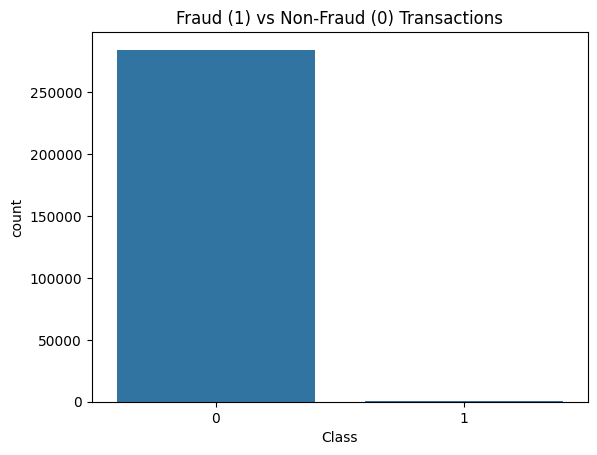

In [5]:
print("Class distribution:\n", df['Class'].value_counts())

# Visualize distribution
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Non-Fraud (0) Transactions")
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['norm_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['norm_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Original Amount aur Time drop kar do (kyunki scaled version ban gaya)
df = df.drop(['Time','Amount'], axis=1)

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount,norm_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
# Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # Probability of class 1 (fraud)


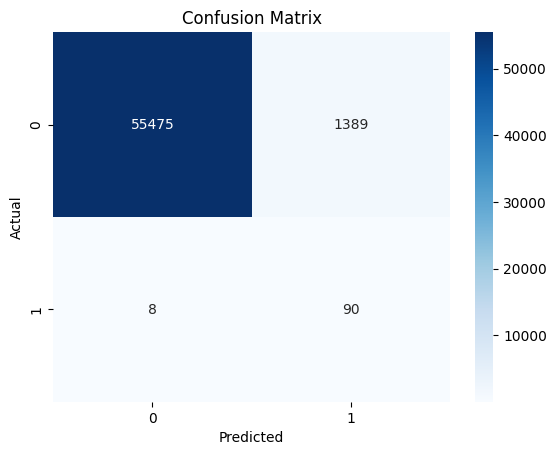

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



ROC-AUC Score: 0.9721667630895914


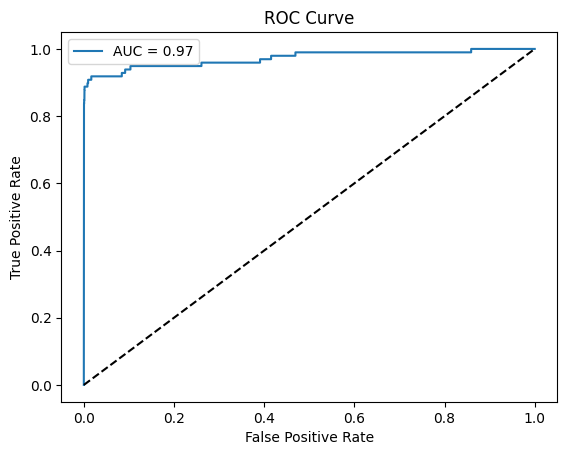

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Train set: (227845, 30) Test set: (56962, 30)


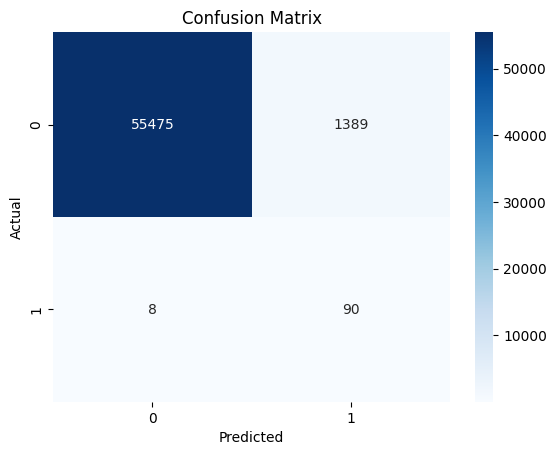

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC Score: 0.9721667630895914


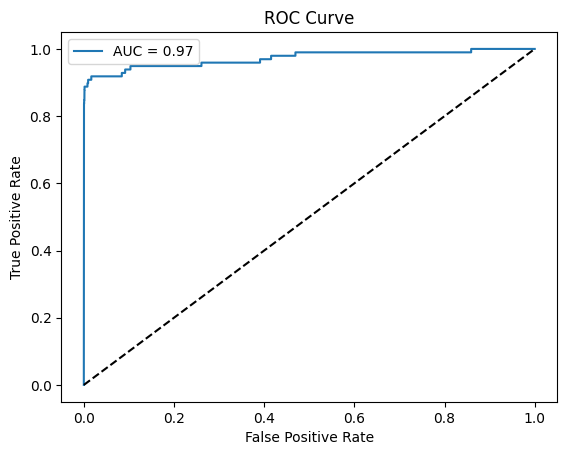

In [15]:
# -------------------------------
# 1️⃣ Train-Test Split
# -------------------------------
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)   # Features
y = df['Class']                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)

# -------------------------------
# 2️⃣ Train Logistic Regression with class weights
# -------------------------------
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# -------------------------------
# 3️⃣ Predictions
# -------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # Probability of fraud

# -------------------------------
# 4️⃣ Confusion Matrix
# -------------------------------
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# 5️⃣ Classification Report
# -------------------------------
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# -------------------------------
# 6️⃣ ROC-AUC Score and Curve
# -------------------------------
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Credit Card Fraud Detection Project

## 1. Project Overview
The main goal of Credit Card Fraud Detection is to **automatically identify whether a transaction is fraudulent or genuine**.  
This is a **binary classification problem** where the target variable `Class` is:  
- `0` → Normal Transaction  
- `1` → Fraud Transaction  

---

## 2. Dataset
- **Source:** Kaggle Credit Card Fraud Dataset  
- **Rows:** 284,807 transactions  
- **Columns:** 31 (V1–V28 PCA features, Time, Amount, Class)  
- **Fraud Transactions:** 492 (~0.17% of dataset) → Highly imbalanced  
- **Missing Values:** None  

**Features:**  
- `Time` → Seconds elapsed since the first transaction  
- `V1–V28` → PCA-transformed anonymized features  
- `Amount` → Transaction amount  
- `Class` → Target variable (0 = Normal, 1 = Fraud)

---

## 3. Data Preprocessing
1. **Scaling:**  
   - `Time` and `Amount` features normalized using `StandardScaler` → `norm_time` and `norm_amount`  
2. **Train-Test Split:**  
   - 80% training, 20% testing  
   - Stratified split to maintain class imbalance in both sets  
3. **Imbalance Handling:**  
   - Logistic Regression trained with `class_weight='balanced'`  
   - Ensures the model pays more attention to the minority class (fraud)  

---

## 4. Model Training
- **Algorithm:** Logistic Regression  
- **Parameters:** `class_weight='balanced', max_iter=1000`  
- **Training Data:** 80% of the dataset  

---

## 5. Model Evaluation

### Confusion Matrix
- True Positives (Fraud correctly detected) → High  
- False Negatives (Fraud missed) → Low  
- False Positives (Normal flagged as fraud) → Moderate  

### Classification Report
| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 0.98   | 0.99     | 56864   |
| 1     | 0.06      | 0.92   | 0.11     | 98      |

**Observations:**  
- **High Recall for fraud (0.92)** → Most fraud transactions detected  
- **Low Precision for fraud (0.06)** → Many false positives  
- **F1-score low (0.11)** due to low precision  

### ROC-AUC
- **ROC-AUC Score:** 0.972  
- Model efficiently separates fraud and normal transactions  

---

## 6. Key Insights
1. Logistic Regression is **good at detecting fraud (high recall)**.  
2. Accuracy alone is misleading due to **high class imbalance**.  
3. Precision for fraud is low → Model flags some normal transactions as fraud.  
4. For banking applications, **Recall is more important than Precision** to minimize missed frauds.  

---

## 7. Future Improvements
- Try **Random Forest / XGBoost / LightGBM** for better precision & F1-score  
- Use **SMOTE / Oversampling techniques** to handle imbalance  
- Feature engineering on `Time` and `Amount` for additional insights  
- Deploy real-time monitoring system with threshold tuning  

---

## 8. Conclusion
- Dataset is highly imbalanced but the model successfully detects most frauds.  
- Logistic Regression provides a **baseline model**.  
- Future models can improve **precision** without losing recall, making the system more reliable in real-world scenarios.
